In [1]:
#import libraries
import numpy as np
import pandas as pd

#matplot
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data= pd.read_csv("C:/Users/Kaushik/Downloads/telecom_churn_data.csv", names=['State', 'Account Length', 'Area code', 'Phone', 'International Plan', 'VMail plan', 'VMail Message' ,'Day mins', 'Day calls', 'Day charge', 'Eve mins', 'Eve calls', 'Eve charge', ' Night mins', 'Night calls', 'Night charge', 'Intl mins', 'Intl calls', 'Intls charge', 'Custserv calls', 'Churn'])

In [11]:
data.loc[data.Churn =='False','Churn'] =0 
data.loc[data.Churn == 'True','Churn'] = 1

In [13]:
data

,State,Account Length,Area code,Phone,International Plan,VMail plan,VMail Message,Day mins,Day calls,Day charge,...,Eve calls,Eve charge,Night mins,Night calls,Night charge,Intl mins,Intl calls,Intls charge,Custserv calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


0        False.
1        False.
2        False.
3        False.
4        False.
         ...   
4612     False.
4613     False.
4614     False.
4615     False.
4616     False.
Name: Churn, Length: 4617, dtype: object

In [8]:
data.loc[data.Churn=='False','Churn'] = 0
data.loc[data.Churn== 'True','Churn'] = 1 

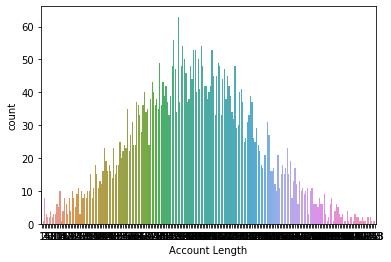

In [4]:
sb.countplot(x=data['Account Length'])

In [5]:
data['Churn-Flag']=(data['Churn']== True).astype(int)

In [6]:
data

,State,Account Length,Area code,Phone,International Plan,VMail plan,VMail Message,Day mins,Day calls,Day charge,...,Eve charge,Night mins,Night calls,Night charge,Intl mins,Intl calls,Intls charge,Custserv calls,Churn,Churn-Flag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144.0,81,24.48,...,15.91,158.6,122,7.14,8.5,6,2.30,3,False.,0
4613,NM,177,408,343-6820,no,yes,29,189.0,91,32.13,...,25.76,163.6,116,7.36,15.7,1,4.24,3,False.,0
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,25.17,200.9,91,9.04,13.0,3,3.51,1,False.,0
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,19.24,165.5,96,7.45,14.3,3,3.86,0,False.,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
State                 4617 non-null object
Account Length        4617 non-null int64
Area code             4617 non-null int64
Phone                 4617 non-null object
International Plan    4617 non-null object
VMail plan            4617 non-null object
VMail Message         4617 non-null int64
Day mins              4617 non-null float64
Day calls             4617 non-null int64
Day charge            4617 non-null float64
Eve mins              4617 non-null float64
Eve calls             4617 non-null int64
Eve charge            4617 non-null float64
 Night mins           4617 non-null float64
Night calls           4617 non-null int64
Night charge          4617 non-null float64
Intl mins             4617 non-null float64
Intl calls            4617 non-null int64
Intls charge          4617 non-null float64
Custserv calls        4617 non-null int64
Churn                 4617 non-nu

In [8]:
X=data.iloc[:,6:20]
y=data.iloc[:,20]

In [9]:
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size=0.3 ,random_state=100)

In [10]:
model=DecisionTreeClassifier()

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
predict=model.predict(X_test)

In [13]:
accuracy_score(y_test, predict)

0.8650793650793651

In [14]:
confusion_matrix(y_test, predict)

array([[1095,  110],
       [  77,  104]], dtype=int64)

In [15]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      False.       0.93      0.91      0.92      1205
       True.       0.49      0.57      0.53       181

    accuracy                           0.87      1386
   macro avg       0.71      0.74      0.72      1386
weighted avg       0.88      0.87      0.87      1386



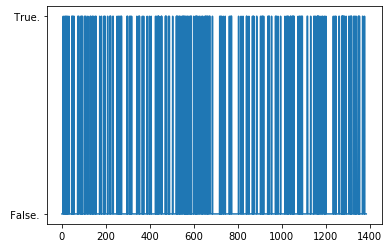

In [16]:
plt.plot(predict)